# Painel Solar: Análise Exploratória de Dados

## Probema de Negócio

You've started a new data science position at a solar cell installation company. They have some solar cell and solar irradiation data in Excel files they want you to load, clean, and analyze, and then deliver your results to the executive team and president. You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are [solar_data_1.xlsx](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/4-Chapter-4/test_your_knowledge/solar_data_1.xlsx) and [solar_data_2.xlsx](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/4-Chapter-4/test_your_knowledge/solar_data_2.xlsx). The [metadata.csv](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/4-Chapter-4/test_your_knowledge/metadata.csv) file describes the different columns.

You can read more about this data and what the different fields mean here: https://
www.kaggle.com/jboysen/google-project-sunroof

## Bibliotecas importadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

plt.style.use('seaborn')
pd.set_option('display.max_colwidth', None)

## Carregamento dos dados

In [2]:
solar_df1 = pd.read_excel('data/solar_data_1.xlsx', engine='openpyxl')
solar_df2 = pd.read_excel('data/solar_data_2.xlsx', engine='openpyxl')

In [3]:
solar_df = pd.concat([solar_df1, solar_df2], ignore_index=True)

In [4]:
solar_df.shape

(55, 7)

In [5]:
solar_df.head()

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.75,3.25,5209.464685,1.243764e+04,0.0
1,Alabama,58997532,14749383.00,9.75,12069.322656,1.896138e+10,549.0
2,Alaska,2179124,544781.00,7.25,6540.612622,4.664927e+08,83.0
3,Arizona,114697808,28674452.00,11.75,18974.796637,4.639329e+10,39553.0
4,Arkansas,28130196,7032549.00,9.75,12099.947974,8.941609e+09,238.0


In [6]:
solar_df.tail()

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
50,Wisconsin,63987980,15996995.00,7.50,8465.384497,1.841213e+10,1916.0
51,Wyoming,3249883,812470.75,7.75,10645.344800,1.108615e+09,29.0
52,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
53,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
54,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0


Uma descrição do significado de cada uma das colunas do _dataframe_ **solar_df** pode ser encontrada no arquivo [metadata.csv](https://github.com/PacktPublishing/Practical-Data-Science-with-Python/blob/main/4-Chapter-4/test_your_knowledge/metadata.csv).

In [7]:
metadata = pd.read_csv('data/metadata.csv')

In [8]:
metadata[metadata['Field'].isin(solar_df.columns)]

,Field,Description
5,yearly_sunlight_kwh_total,total solar energy generation potential for all roof space in that region
11,number_of_panels_total,"# of solar panels potential for all roof space in that region, assuming 1.650m x 0.992m panels"
19,yearly_sunlight_kwh_median,"kWh/kw/yr for the median roof, in DC (not AC) terms"
27,state_name,Name of the state containing that region
28,kw_total,# of kW of solar potential for all roof types in that region (assuming 250 watts per panel)
29,kw_median,kW of solar potential for the median building in that region (assuming 250 watts per panel)
30,existing_installs_count,"# of buildings estimated to have a solar installation, at time of data collection"


## Limpeza dos dados

### Tratamento de dados duplicados

Como o _dataset_ de trabalho é composto por dois arquivos distintos, num primeiro momento, cabe verificar a existência de registros (linhas) duplicados.

In [9]:
solar_df.duplicated().sum()

3

Para excluir os dados duplicados, utiliza-se o seguinte comando:

In [10]:
solar_df.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
solar_df.shape

(52, 7)

### Tratamento de dados faltantes

O comando seguinte calcula o total de dados faltantes para cada uma das colunas do conjunto de dados.

In [12]:
solar_df.isna().sum()

state_name                    1
number_of_panels_total        0
kw_total                      0
kw_median                     1
yearly_sunlight_kwh_median    1
yearly_sunlight_kwh_total     0
existing_installs_count       1
dtype: int64

Dada a pequena quantidade de dados faltantes, é possível verificar visualmente cada uma deles:

In [13]:
na_df = pd.DataFrame()
for colname in solar_df.columns:
    na_df = pd.concat([na_df, solar_df[solar_df.isna()[colname] == True]], ignore_index=True)
na_df

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.75,3.25,5209.464685,1.243764e+04,0.0
1,New Jersey,51270566,12817641.50,NaN,7160.259717,1.506896e+10,12640.0
2,Maryland,29454507,7363626.75,5.25,NaN,8.946581e+09,6077.0
3,Kansas,26403168,6600792.00,8.25,10583.576611,8.588088e+09,NaN


A escolha do método de tratamento mais adequado a cada caso será feita na seção de Análise Exploratória dos Dados.

### Checagem de que os tipos de dados estejam corretos

Para esta etapa, utiliza-se o método `info` de um _dataframe_ pandas:

In [14]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  51 non-null     object 
 1   number_of_panels_total      52 non-null     int64  
 2   kw_total                    52 non-null     float64
 3   kw_median                   51 non-null     float64
 4   yearly_sunlight_kwh_median  51 non-null     float64
 5   yearly_sunlight_kwh_total   52 non-null     float64
 6   existing_installs_count     51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


Verifica-se que não há necessidade de alteração de nenhum dos tipos de dados das colunas do conjunto de dados.

## Análise Exploratória de Dados

A checagem de tipos de dados mostrou que das 8 (oito) variáveis do _dataframe_, apenas aquela referente ao nome do estado `state_name` é de tipo não numérico. Para essa coluna, pode-se verificar quais seriam seus valores únicos por meio do método `unique`. 

In [15]:
solar_df['state_name'].unique()

array([nan, 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [16]:
len(solar_df['state_name'].unique())

52

Note-se que a coluna `state_name` refere-se aos 51 estados americanos mais o distrito federal de Columbia (_District of Columbia_). O local desconhecido será nomeado como 'Unknown':

In [17]:
solar_df.loc[solar_df['state_name'].isna(), 'state_name'] = 'Unknown'

Para os demais itens faltantes, será aplicado o seguinte algorítmo de _machine learning_:

In [18]:
imputer = KNNImputer(n_neighbors=2)
state_names = solar_df[['state_name']] 
numeric_df = solar_df.drop('state_name', axis=1)
imputed = imputer.fit_transform(numeric_df)
numeric_df[numeric_df.columns] = imputed
solar_df = pd.concat([state_names, numeric_df], axis=1)

In [19]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  52 non-null     object 
 1   number_of_panels_total      52 non-null     float64
 2   kw_total                    52 non-null     float64
 3   kw_median                   52 non-null     float64
 4   yearly_sunlight_kwh_median  52 non-null     float64
 5   yearly_sunlight_kwh_total   52 non-null     float64
 6   existing_installs_count     52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [20]:
solar_df.describe()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
count,5.200000e+01,5.200000e+01,52.000000,52.000000,5.200000e+01,52.000000
mean,6.403502e+07,1.600876e+07,7.959135,10100.166556,2.089173e+10,12980.894231
std,9.276369e+07,2.319092e+07,1.979323,3389.369162,3.323686e+10,47392.178790
min,3.100000e+01,7.750000e+00,3.250000,5156.452783,1.243764e+04,0.000000
25%,1.465991e+07,3.664977e+06,6.687500,7468.196730,5.245807e+09,332.500000
50%,4.122448e+07,1.030612e+07,7.750000,9657.233911,1.288109e+10,1810.000000
75%,6.996107e+07,1.749027e+07,9.062500,11623.308606,2.069780e+10,5829.500000
max,5.310227e+08,1.327557e+08,13.000000,19004.649878,1.980163e+11,328899.000000


A seguir são mostradas um histograma das deitribuições das variáveis numéricas:

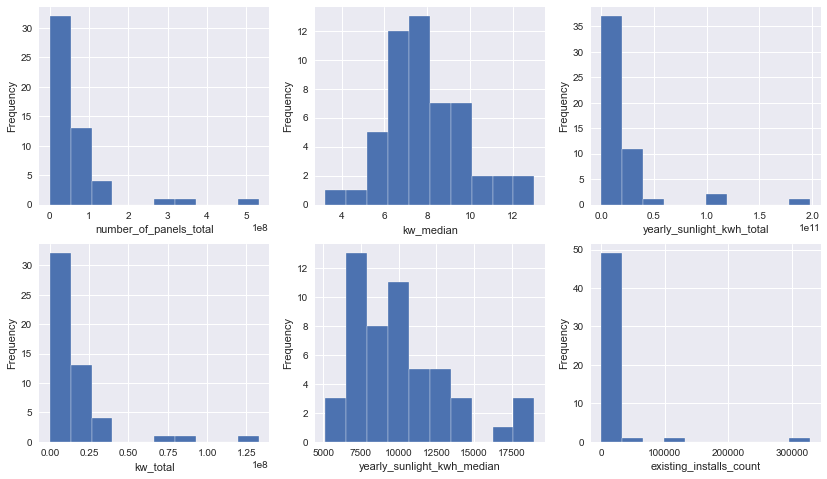

In [21]:
fig, ax = plt.subplots(2,3, figsize=(14, 8))
for i in range(3):
    for j in range(2):
        colname = solar_df.columns[2*i + j + 1]
        solar_df[colname].hist(edgecolor='white', ax=ax[j,i])
        ax[j,i].set_xlabel(colname)
        ax[j,i].set_ylabel('Frequency')
plt.show()

Os gráficos acima mostram que alguns estados destacam-se dos demais quanto ao número de painéis solares. São eles:

In [22]:
solar_df[solar_df['number_of_panels_total'] > 2e8]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
5,California,531022657.0,1.327557e+08,9.75,14460.077979,1.980163e+11,328899.0
10,Florida,305682374.0,7.642059e+07,12.75,17250.183057,1.050627e+11,104123.0
44,Texas,348054893.0,8.701372e+07,9.50,12708.246240,1.171552e+11,13969.0


Quanto à irradiância solar total, os estados que mais se destacam são:

In [23]:
solar_df[solar_df['yearly_sunlight_kwh_total'] > 1e11]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
5,California,531022657.0,1.327557e+08,9.75,14460.077979,1.980163e+11,328899.0
10,Florida,305682374.0,7.642059e+07,12.75,17250.183057,1.050627e+11,104123.0
44,Texas,348054893.0,8.701372e+07,9.50,12708.246240,1.171552e+11,13969.0


In [24]:
solar_df[solar_df['yearly_sunlight_kwh_median'] > 15000]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
3,Arizona,114697808.0,28674452.00,11.75,18974.796637,4.639329e+10,39553.0
10,Florida,305682374.0,76420593.50,12.75,17250.183057,1.050627e+11,104123.0
12,Hawaii,15969111.0,3992277.75,13.00,19004.649878,6.004369e+09,25414.0
32,New Mexico,24388480.0,6097120.00,11.25,18833.979590,1.012644e+10,3735.0


O gráfico de dipersão seguinte mostra a relação entre as variáveis `number_of_panels_total` e `yearly_sunlight_kwh_total`:

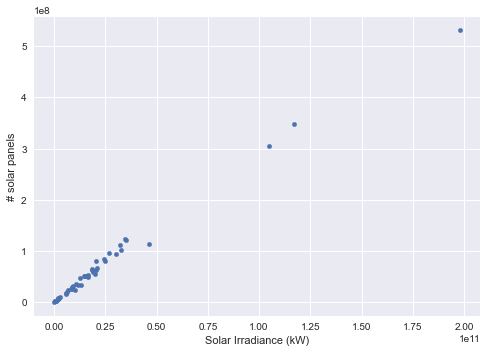

In [25]:
ax = solar_df.plot.scatter(x='yearly_sunlight_kwh_total', y='number_of_panels_total')
ax.set_xlabel('Solar Irradiance (kW)')
ax.set_ylabel('# solar panels')
plt.show()

Quanto à correlação entre as variáveis numéricas, o método `corr` fornece o resultado:

In [26]:
solar_df.corr()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
number_of_panels_total,1.000000,1.000000,0.306932,0.315567,0.995479,0.817095
kw_total,1.000000,1.000000,0.306932,0.315567,0.995479,0.817095
kw_median,0.306932,0.306932,1.000000,0.923917,0.329216,0.268650
yearly_sunlight_kwh_median,0.315567,0.315567,0.923917,1.000000,0.353495,0.327189
yearly_sunlight_kwh_total,0.995479,0.995479,0.329216,0.353495,1.000000,0.855151
existing_installs_count,0.817095,0.817095,0.268650,0.327189,0.855151,1.000000


Os estados com maior irradiância solar (`yearly_sunlight_kwh_total`) são:

In [27]:
x= solar_df[['state_name', 'yearly_sunlight_kwh_total']]. \
    sort_values(by='yearly_sunlight_kwh_total', ascending=False)[:10]. \
    set_index('state_name')
x

,yearly_sunlight_kwh_total
state_name,
California,1.980163e+11
Texas,1.171552e+11
Florida,1.050627e+11
Arizona,4.639329e+10
New York,3.492613e+10
Ohio,3.478140e+10
Georgia,3.257635e+10
Illinois,3.232441e+10
North Carolina,3.026663e+10


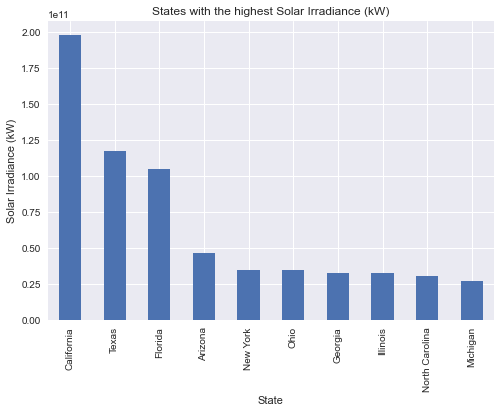

In [28]:
ax = x.plot.bar(legend=False)
ax.set_title('States with the highest Solar Irradiance (kW)')
ax.set_xlabel('State')
ax.set_ylabel('Solar Irradiance (kW)')
plt.show()

In [29]:
solar_df.sort_values(by='state_name')

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
1,Alabama,58997532.0,1.474938e+07,9.750,12069.322656,1.896138e+10,549.0
2,Alaska,2179124.0,5.447810e+05,7.250,6540.612622,4.664927e+08,83.0
3,Arizona,114697808.0,2.867445e+07,11.750,18974.796637,4.639329e+10,39553.0
4,Arkansas,28130196.0,7.032549e+06,9.750,12099.947974,8.941609e+09,238.0
5,California,531022657.0,1.327557e+08,9.750,14460.077979,1.980163e+11,328899.0
6,Colorado,55174753.0,1.379369e+07,6.750,9690.190088,1.970758e+10,24140.0
7,Connecticut,31250890.0,7.812722e+06,6.250,7091.383154,9.007033e+09,5253.0
8,Delaware,1985389.0,4.963472e+05,8.000,9746.691431,6.068660e+08,90.0
9,District of Columbia,3096860.0,7.742150e+05,4.250,5156.452783,9.449727e+08,443.0
10,Florida,305682374.0,7.642059e+07,12.750,17250.183057,1.050627e+11,104123.0


In [30]:
solar_df.to_csv('data/solar_data.xlsx', index=False)

## Resumo

Os dados correspodem ao 50 estados americanos mais o distrito federal de Columbia (_District of Columbia_) e um local desconhecido (tratado como _Unknown_). Em geral, as distribuições de dados são assimétricas à direita com grandes valores discrepantes. Os valores atípicos correspondem aos estados Califórnia, Florida e Texas que possuem um número de painéis solares muito maior que a média nacional. Isto provavelmente se justifica pelo nível de irradiância solar desses estados. Os dados faltantes foram substituídos por meio do um algorítmo de _machine learning_ com imputação KNN. Em seguida, os dados foram salvos em um arquivo Excel para uso posterior.